<a name="top"></a>

<div style="width:1000 px">

<h1>Exploratory Data Analysis</h1>
<h3>MetPy for Analysis and Visualization of Weather Data in Python</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Table of Contents
1. <a href="#eda">Exploratory Data Analysis</a>
1. <a href="#table">EDA I: Tabular Data</a>
1. <a href="#multi">EDA II: Multidimensional Data</a>
1. <a href="#more">More Information</a>

<a name="eda"></a>
## Exploratory Data Analysis

Our first topic is *Exploratory Data Analysis*. 

<div class="alert alert-success">
    <b>Discussion</b>: 

What does this process sound like we’re going to do?<br>
What do you think could be the goals of this type of analysis? What do you think EDA is not?
</div>

While there are many ways to achieve this, we propose this general framework towards understanding data. First, and arguably the most difficult hurdle is finding data and reading it into Python. Then we want to know about the metadata, the data that describes what the values represent. Then we want to understand what single variables are available, units, etc. And finally we want to know how variables relate to each other. This is where we bridge the gap between EDA and explanatory analysis. 

<img src="https://elearning.unidata.ucar.edu/metpy/PythonReadiness/media/EDAFramework.png">

<div class="alert alert-success">
    <b>Discussion</b>: 

What do we look for in an exploratory data analysis?
    
When we acquire a new dataset, what kind of information would we need to say we can “fully describe” the data? Consider any and all types of earth systems data.
    
Document your responses below.
</div>

<div class="alert alert-info">
    <b>SOLUTION</b>
<br>
    <i>Not an exhaustive list, but to get started...</i><br>
Global Metadata:
<ul>
    <li>Sources or sensors</li>
    <li>Geographic reference system</li>
    <li>Spatial extent, lat/lon ranges, or station locations</li>
    <li>Valid time(s)</li>
</ul>
Variable Metadata:
<ul>
    <li>Variables names/descriptions</li>
    <li>Variable dimensionality (x, y, z, t, etc)</li>
    <li>Units</li>
    <li>Ranges of values</li>
    <li>Missing values and/or missing value identifiers</li>
</ul>
</div>

<a name="table"></a>
## EDA I: Tabular Data

<p>In this exercise we will explore local time series data in csv format. These data are "local" because they are stored on the same machine where we are running this notebook from.</p>

<img src="https://elearning.unidata.ucar.edu/metpy/PythonReadiness/media/localdata.png">

<p>We start by importing the Python package required to read the csv, <code>pandas</code>, with the abbreviated name <code>pd</code>. Then we use the <code>read_csv()</code> function from the <code>pd</code> package to read the file, and load it into our Python project as a pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html" target="blank">DataFrame</a>.</p>

In [1]:
# import required packages
import pandas as pd

### Time Series #1

We will explore two different kinds of time series data. This is the first.

In [2]:
# load csv from local folder
df = pd.read_csv('../../data/timeseries.csv')

# preview the DataFrame, df
df

,Unnamed: 0,DATE,P,RH,T,WD,WS,WSMAX
0,2016-03-31 00:00:00,2016-03-31 00:00:00,980.2,42.4,21.3,166.6,4.4,7.3
1,2016-03-31 00:01:00,2016-03-31 00:01:00,980.2,42.7,21.3,168.6,3.9,5.7
2,2016-03-31 00:02:00,2016-03-31 00:02:00,980.2,42.7,21.2,157.7,3.9,5.8
3,2016-03-31 00:03:00,2016-03-31 00:03:00,980.2,42.8,21.2,161.8,3.8,4.7
4,2016-03-31 00:04:00,2016-03-31 00:04:00,980.2,43.1,21.2,152.9,3.2,4.4
...,...,...,...,...,...,...,...,...
1431,2016-03-31 23:55:00,2016-03-31 23:55:00,971.2,82.5,21.5,170.1,3.5,4.9
1432,2016-03-31 23:56:00,2016-03-31 23:56:00,971.2,82.5,21.5,159.9,3.1,4.3
1433,2016-03-31 23:57:00,2016-03-31 23:57:00,971.1,82.5,21.5,164.5,2.7,3.7
1434,2016-03-31 23:58:00,2016-03-31 23:58:00,971.0,82.5,21.5,161.4,2.7,4.2


<div class="alert alert-success">
    <b>Discussion</b>: 
    
What information can we find in this preview alone? What information from our earlier EDA brainstorm are we missing?
</div>

<div class="alert alert-info">
    <b>SOLUTION</b>
<br>
<ul>
    <li>Temporal range (assuming the table is sorted by date), 1436 entries</li>
    <li>Variables stored in the file (assuming all are printed in the display)</li>
    <li>Dimensionality 1436x8</li>
    <li>Units (only can guess based on the value preview)</li>
</ul>
    
While we can’t tell the spatial extent or the station this is coming from, we can assume these are measurements from a single point source.
</div>

#### Other helpful pandas functions

Recall the other information we would want to know for a successful EDA. These functions below help us to more clearly see that information in a pandas DataFrame.

In [3]:
# list all column headers
df.columns

Index(['Unnamed: 0', 'DATE', 'P', 'RH', 'T', 'WD', 'WS', 'WSMAX'], dtype='object')

In [4]:
# describe the DataFrame to see the range of values
df.describe()

,P,RH,T,WD,WS,WSMAX
count,1436.000000,1436.000000,1436.000000,1436.000000,1417.000000,1417.000000
mean,975.985376,72.414485,18.303134,160.920125,3.448977,5.138462
std,2.338044,18.504964,2.447679,39.811933,1.096657,1.765379
min,970.900000,42.400000,14.700000,1.500000,1.000000,1.200000
25%,974.600000,49.675000,15.200000,154.100000,2.700000,3.900000
50%,976.200000,78.900000,19.100000,163.600000,3.400000,5.100000
75%,977.325000,90.300000,19.925000,171.700000,4.200000,6.300000
max,980.200000,93.800000,23.000000,359.500000,7.400000,13.300000


<div class="alert alert-success">
    <b>Discussion</b>: 
    
Referring to the syntax we used to describe the DataFrame compared to the syntax we used to print the column names, why do we use () after <code>df.describe()</code> but not after <code>df.columns</code>?
</div>

<div class="alert alert-info">
    <b>SOLUTION</b>
<br>
<code>describe()</code> is a method, or type of function that operates on a DataFrame object. Functions (and methods) require parentheses as a matter of syntax because they may take inputs. 
<code>columns</code> is an attribute of the DataFrame Object. We are not executing a function in this task as we are just printing information contained in the object, in this case, the column headers (labels).
</div>

Not every dataset will use "Null" to denote missing data, some will choose -999… or some other large negative as a placeholder. Because our minimum values in the dataframe description seem reasonable, let’s check for Null values. 

In [5]:
# Use pandas isnull() to find missing values
df.isnull()

,Unnamed: 0,DATE,P,RH,T,WD,WS,WSMAX
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False


Our result isn't particularly useful since we have so many entries that are clipped from the preview... Let's try to add them together.

In [6]:
# sum all null values by column
df.isnull().sum()

Unnamed: 0     0
DATE           0
P              0
RH             0
T              0
WD             0
WS            19
WSMAX         19
dtype: int64

<div class="alert alert-success">
    <b>Discussion</b>: 
    
What can you ascertain from the results, and what do they mean, physically? What might explain the missing data? Try to be as descriptive as possible.
</div>

<div class="alert alert-info">
    <b>SOLUTION</b>
<br>
Missing 19 wind speed and wind speed max values. 
<br>
Unlikely that the WS values were removed in error, as there are the same number of WSMAX values missing.

More likely that there was an issue with the WS sensor.
<br>
Given that we have about 1 entry per minute, we are missing about 19 minutes of wind speed information. 

</div>

We can use pandas selection tools to determine which times from the dataset are missing values.

In [ ]:
# determine what times are missing WS
# Note the syntax for selecting one column:
# DataFrame[‘column name’]


# create a “mask” of the entries where WS = null
nullWS = df['WS'].isnull()


# pull times where nullWS is True
df['DATE'][nullWS]

#### EDA Plotting

Let’s now move into phase four of the EDA framework and examine how variables relate to each other. We will do this by plotting some of the variables. 


But first, consider what we know to be true about the physical world. We have 24 hours worth of data, what can we predict the shape of temperature to look like over a 24 hour time period? What about relative humidity? What are possible red flags that would determine if we have a bad dataset?

<Axes: >

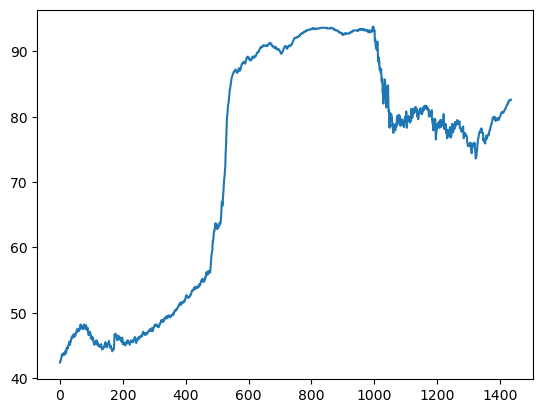

In [8]:
# plot the shape of relative humidity
df['RH'].plot()

<Axes: >

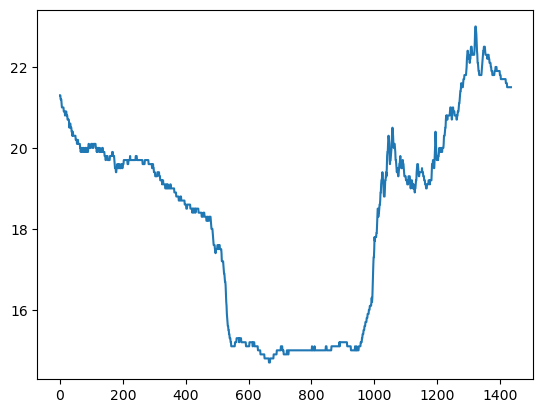

In [9]:
# plot the shape of temperature
df['T'].plot()

Do these plots make physical sense? Why or why not?

### Time Series #2

Let's try out an EDA on a different time series next. 

In [10]:
# read data with Pandas
df2 = pd.read_csv('../../data/SFC_obs.csv')


# display Pandas DataFrame preview
df2

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,...,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,emsl,cloud_cover,wxsym,uwind,vwind
0,YUM,1993-03-12 06:00:00,-114.6060,32.6566,73.94,32.00,21.37,330.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1014.562037,0,0,4.500000,-7.794229e+00
1,SDB,1993-03-12 06:00:00,-118.7253,34.7434,55.94,30.92,38.34,40.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1019.302981,0,0,-2.571150,-3.064178e+00
2,PGA,1993-03-12 06:00:00,-111.4484,36.9261,46.94,29.84,51.17,330.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1021.673453,0,0,3.500000,-6.062178e+00
3,PAMD,1993-03-12 06:00:00,-146.3380,59.4320,42.98,29.84,59.49,90.0,21.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1014.900676,0,0,-21.000000,-1.285879e-15
4,MHS,1993-03-12 06:00:00,-122.3171,41.3149,37.94,32.00,78.96,140.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1021.673453,0,0,-0.642788,7.660444e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,CYOW,1993-03-12 12:00:00,-75.6692,45.3225,-6.88,-19.84,52.19,260.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1026.753036,0,0,2.954423,5.209445e-01
9934,CYOW,1993-03-12 13:00:00,-75.6692,45.3225,-4.00,-16.60,53.66,250.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1026.414397,0,0,2.819078,1.026060e+00
9935,CYOW,1993-03-12 14:00:00,-75.6692,45.3225,-0.40,-13.00,54.27,250.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1027.091675,0,0,3.758770,1.368081e+00
9936,CYOW,1993-03-12 15:00:00,-75.6692,45.3225,1.04,-11.92,53.54,240.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1027.091675,0,0,2.598076,1.500000e+00


<div class="alert alert-success">
    <b>Discussion</b>: 
    
Immediate we see differences between the previous dataset and this one. What are they?
</div>

<div class="alert alert-info">
    <b>SOLUTION</b>

- Multiple stations in a single file
- We have location information
- More variables
- More observations

</div>

In [11]:
# describe the DataFrame to see the range of values
df2.describe()

,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,skyl1,skyl2,skyl3,skyl4,ice_accretion_1hr,emsl,cloud_cover,wxsym,uwind,vwind
count,9938.000000,9938.000000,8947.000000,8912.000000,8887.000000,9802.000000,9795.000000,272.000000,9386.000000,5261.000000,...,5872.000000,3082.000000,849.000000,41.000000,0.0,9386.000000,9938.000000,9938.000000,9730.000000,9730.000000
mean,-99.713981,40.277892,29.742358,20.148429,69.465721,164.434809,7.801115,0.041434,30.220698,1023.987246,...,8046.696185,10325.665152,10343.462898,11639.024390,NaN,1023.390279,2.312035,10.088247,-0.372368,-4.181499
std,23.648412,8.277083,17.416024,16.802810,17.414696,136.189908,5.747767,0.094298,0.169661,6.895930,...,8177.687903,8905.840887,8724.551012,8221.249237,NaN,5.745375,2.281299,24.828658,6.314983,6.084683
min,-176.646000,19.720300,-22.000000,-31.000000,12.160000,0.000000,0.000000,0.000000,29.330000,993.100000,...,100.000000,100.000000,500.000000,1200.000000,NaN,993.227788,0.000000,0.000000,-45.315389,-32.889242
25%,-111.973000,34.900000,16.880000,8.960000,56.430000,30.000000,4.000000,0.000000,30.110000,1019.400000,...,1900.000000,3000.000000,3800.000000,4000.000000,NaN,1019.641620,0.000000,0.000000,-4.000000,-7.878462
50%,-95.710300,39.813800,28.940000,19.940000,71.920000,130.000000,7.000000,0.000000,30.230000,1023.900000,...,4200.000000,7000.000000,7000.000000,12000.000000,NaN,1023.705286,1.000000,0.000000,-0.000000,-3.758770
75%,-83.985800,44.128800,41.900000,29.840000,83.560000,310.000000,11.000000,0.020000,30.320000,1027.900000,...,12000.000000,20000.000000,20000.000000,20000.000000,NaN,1026.753036,4.000000,0.000000,3.500000,-0.000000
max,174.116900,71.282600,80.960000,69.980000,100.000000,360.000000,78.000000,0.510000,30.960000,1048.400000,...,35000.000000,30000.000000,30000.000000,25000.000000,NaN,1048.425923,6.000000,97.000000,78.000000,43.502774


Notice that we don’t get a summary of the categorical variables, only the numeric variables. 

With this trick below, we describe all columns by casting all values as an object type, then use describe

In [12]:
# optionally, transpose the table for clearer reading by appending .transpose()
df2.astype('object').describe().transpose()

,count,unique,top,freq
station,9938,1080,GCC,31
valid,9938,244,1993-03-12 16:00:00,1024
lon,9938.0,1076.0,-117.0154,31.0
lat,9938.0,1074.0,44.3489,31.0
tmpf,8947.0,205.0,24.98,227.0
dwpf,8912.0,163.0,21.92,299.0
relh,8887.0,2138.0,100.0,130.0
drct,9802.0,46.0,0.0,1156.0
sknt,9795.0,53.0,0.0,1221.0
p01i,272.0,31.0,0.0,142.0


Let's now use our pandas selection tools to more closely examine a single station.

Note the syntax for selecting one column:

<code>DataFrame['column name']</code>

In [13]:
# create a stations variable and preview it
stations = df2['station']
stations

0        YUM
1        SDB
2        PGA
3       PAMD
4        MHS
        ... 
9933    CYOW
9934    CYOW
9935    CYOW
9936    CYOW
9937    CYOW
Name: station, Length: 9938, dtype: object

In [14]:
# create a true/false "mask" where the value in the series is the desired string
fnl_mask = stations.values == 'FNL'
fnl_mask

array([False, False, False, ..., False, False, False])

In [15]:
# sum all True values to determine how many entries we have
sum(fnl_mask)

11

In [16]:
# trim df to just the entries where the mask is true
df_fnl = df2[fnl_mask]
df_fnl

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,...,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,emsl,cloud_cover,wxsym,uwind,vwind
2102,FNL,1993-03-12 06:00:00,-105.0113,40.4518,20.84,10.94,65.04,340.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1028.107591,0,0,4.788282e+00,-13.155697
2241,FNL,1993-03-12 07:00:00,-105.0113,40.4518,19.94,8.96,61.85,330.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1028.107591,0,0,4.500000e+00,-7.794229
2322,FNL,1993-03-12 08:00:00,-105.0113,40.4518,19.94,10.94,67.58,350.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1029.123508,0,0,1.736482e+00,-9.848078
2509,FNL,1993-03-12 09:00:00,-105.0113,40.4518,18.86,7.88,61.70,10.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1028.784869,0,0,-2.431074e+00,-13.787309
2671,FNL,1993-03-12 10:00:00,-105.0113,40.4518,17.96,8.96,67.33,340.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1029.123508,0,0,2.052121e+00,-5.638156
2778,FNL,1993-03-12 11:00:00,-105.0113,40.4518,15.98,5.90,63.86,10.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1029.800786,0,0,-8.682409e-01,-4.924039
2955,FNL,1993-03-12 12:00:00,-105.0113,40.4518,14.90,5.00,64.24,360.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1029.800786,0,0,1.224647e-15,-5.000000
3206,FNL,1993-03-12 13:00:00,-105.0113,40.4518,14.00,5.00,66.82,30.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1030.139424,0,0,-4.000000e+00,-6.928203
3317,FNL,1993-03-12 14:00:00,-105.0113,40.4518,14.00,3.92,63.59,350.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1030.816702,0,0,6.945927e-01,-3.939231
3534,FNL,1993-03-12 15:00:00,-105.0113,40.4518,15.98,2.84,55.49,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1031.493980,0,0,-0.000000e+00,-0.000000


<div class="alert alert-success">
    <b>Exercise</b>: 

Recall that the whole reason we do EDA is to understand our data to ultimately determine if it is sufficient for a scientific or research question. Let's put together all of these tools now in a new scenario. 
    
<b>Goal:</b>
    
Working in pairs, determine if this dataset is appropriate for your research question.
    
<b>Scenario:</b>

You are starting out on a project related to how tropospheric ozone concentrations in the US have changed in the last 10 years. 
You’ve found a paper that provides a benchmark dataset that could be helpful for you in your statistical comparisons. To determine if it is appropriate for your project, you must first examine the dataset using the EDA approach we just introduced.     
    
<b>Tasks:</b>
    
First, load the dataset (via the read_csv function)
http://hdl.handle.net/11304/89dd440e-4e10-496e-b476-1ccf0ebeb4f3

The paper the dataset was from to help find some critical metadata:
https://essd.copernicus.org/articles/13/3013/2021 

Then, find the following information:
1. Spatial extent of the data, the number of records, and summary of stations
1. Temporal extent of the data
1. Summary of all variables 
1. Examine the ranges of values for a few relevant variables to determine if any data seem like outliers or incorrect
1. Summarize information about any missing data
1. Then, make a decision on whether you want to use this dataset for the research project in this scenario.
    
</div>

<div class="alert alert-info">
    <b>SOLUTION</b>
    
1. Global (lon = ~-170 → ~170; lat = ~-90 → 82)
<br>5577 records, 53 columns
<br>1390 stations in the US (describe as type: objects)
1. No time in the dataset, but from the paper can find the description “aggregated ozone metrics from the years 2010–2014”
1. Long list, summarized:
- Location (x,y,z, climatic zone)
- Proximity to water, trees, population centers, land use type
- Aggregated ozone metrics 
4. All ozone metrics have a min of -999, doesn’t seem physically real, this must be missing data
4. No null values, so this dataset must use -999 as a missing value placeholder. 
    
    
    <b>Is this dataset appropriate for our research question?</b>
    
Likely yes, but there is a case to be made for no as well. It will depend on how you define "change in the last 10 years", and if the 575 missing records are insufficient for the benchmark analysis, but the spatiotemporal extent covers the desired area and time range. 
    
</div>

In [17]:
df3 = pd.read_csv('http://hdl.handle.net/11304/89dd440e-4e10-496e-b476-1ccf0ebeb4f3')
df3

,id,country,htap_region,climatic_zone,lon,lat,alt,relative_alt,type,type_of_area,...,o3_perc90,o3_perc98,o3_dma8eu,o3_avgdma8epax,o3_drmdmax1h,o3_w90,o3_aot40,o3_nvgt070,o3_nvgt100,dataset
0,3336,Germany,EUR,cool_moist,8.308210,54.924970,12.0,3,background,rural,...,46.4399,54.8468,53.5738,38.8078,50.7704,86.1266,10197.4742,2.0,0.0,test
1,3338,Germany,EUR,cool_moist,12.725280,54.436670,1.0,1,background,rural,...,44.0575,53.7778,51.3996,35.8313,48.3935,69.0987,7573.2222,1.0,0.0,train
2,3339,Germany,EUR,cool_moist,6.093923,50.754704,205.0,66,background,urban,...,41.1803,58.4009,54.9030,32.6169,49.8276,154.1263,8655.4730,5.4,1.0,train
3,3340,Germany,EUR,cool_moist,8.548389,52.023169,102.0,29,background,urban,...,38.1730,53.5109,50.1112,28.6179,46.2694,120.2575,6036.5851,2.6,0.0,test
4,3341,Germany,EUR,cool_moist,6.874554,51.862000,45.0,8,background,rural,...,40.6623,58.4082,53.9564,31.0051,50.6809,203.4584,9045.4745,6.8,1.2,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5572,17685,Germany,EUR,cool_moist,11.027920,49.322730,344.0,37,background,urban,...,42.4290,59.3735,56.0336,31.0232,51.5903,123.8122,10775.6201,3.5,0.0,train
5573,17718,Germany,EUR,cool_dry,11.850274,52.602056,35.0,5,background,urban,...,44.7611,58.4130,55.1136,34.8838,49.9512,146.6134,11145.3874,5.0,0.0,train
5574,17719,Germany,EUR,cool_dry,11.091078,51.456071,143.0,13,background,rural,...,43.4429,56.3841,54.4162,34.0865,49.3407,116.7581,9746.6681,2.5,0.0,val
5575,17720,Germany,EUR,cool_moist,13.420573,48.947611,858.0,76,background,rural,...,52.7680,63.9991,60.3341,41.3771,54.8419,108.2840,18120.8647,4.5,0.0,train


In [18]:
df3usa = df3[df3.country == 'United States of America']
len(df3usa)

1390

In [19]:
sum(df3usa['o3_daytime_avg'] == -999)
sum(df3usa['o3_w90'] == -999)
sum(df3usa['o3_median'] == -999)

575

<a name="#multi"></a>
## EDA II: Multidimensional Data

In the previous section, we looked at three different examples of tabular data. These all represented point-based data, but that's not the only kind of data we work with in the Earth Systems Sciences. 

In fact, a large percentage of the data used in the Earth Systems Sciences is array-based. 

Now let's try examining a local NetCDF File like the one we saw in the lesson. 

While <code>pandas</code> is a great package for examining tabular data, it is insufficient for multidimensional or array-based data.

To examine these types of data we use a different package, <code>xarray</code>, with the abbreviated name <code>xr</code>.

In [20]:
# import required packages 
import xarray as xr

In [21]:
# open the file with xarray open_dataset
nc = '../../data/irma_gfs_example.nc'
data = xr.open_dataset(nc)

# View a summary of the Dataset
data

<xarray.Dataset>
Dimensions:                              (time1: 5, latitude: 81,
                                          isobaric3: 21, isobaric1: 21,
                                          longitude: 131)
Coordinates:
  * time1                                (time1) datetime64[ns] 2017-09-05T12...
    reftime                              datetime64[ns] ...
  * latitude                             (latitude) float32 50.0 49.5 ... 10.0
  * isobaric3                            (isobaric3) float64 1e+04 ... 1e+05
  * isobaric1                            (isobaric1) float64 1e+04 ... 1e+05
  * longitude                            (longitude) float32 250.0 ... 315.0
Data variables:
    Vertical_velocity_pressure_isobaric  (time1, isobaric1, latitude, longitude) float32 ...
    Relative_humidity_isobaric           (time1, isobaric3, latitude, longitude) float32 ...
    Temperature_isobaric                 (time1, isobaric3, latitude, longitude) float32 ...
    u-component_of_wind_isobaric         (time1, isobaric3, latitude, longitude) float32 ...
    v-component_of_wind_isobaric         (time1, isobaric3, latitude, longitude) float32 ...
    Geopotential_height_isobaric         (time1, isobaric3, latitude, longitude) float32 ...
    LatLon_361X720-0p25S-180p00E         int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

<div class="alert alert-success">
    <b>Discussion</b>: 

Of the must-have information for EDA, what information can we gather from just this preview?
</div>


<div class="alert alert-info">
    <b>SOLUTION</b>

- Source/model
- Projection information
- Spatial extent
- Valid times
- Variable names and description
- Variable dimensionality
- Variable units

We do not yet have a sense of any missing data or ranges of values.    
    
</div>

#### CF (Climate and Forecast) Conventions

Notice that we have info in the global metadata called Conventions. While not crucial to us right now, these will be important for future analyses you do, so let’s briefly discuss. 

Consider the following, you are working with several datasets from various sources and comparing variables in one region to another. Imagine comparing temperatures from three different datasets, but the labels for temperature are different. One is “T”, one is “temp”, and one is “temperature”. Additionally, two of the datasets record temperature in K and one records temperature in C. Reproducing results on these datasets would be cumbersome because you would have to keep changing variable names, units, and potentially other attributes. 

From the <a href="http://cfconventions.org/" target="blank">CF website</a>:
>“The Climate and Forecast metadata conventions (CF) are a community-developed standard designed to promote the processing and sharing of climate and forecast model and observational output data, and derived data products. The conventions define metadata that provide a definitive description of what the data in each variable represents, and the spatial and temporal properties of the data. This enables users of data from different sources to decide which quantities are comparable, and facilitates building applications with powerful extraction, regridding, and display capabilities. The CF convention includes a standard name table, which defines strings that identify physical quantities.”

Continuing where we left off, we will now explore the potential of missing data in this dataset. To do this, we'll begin by isolating a single variable for interrogation, temperature (on isobaric surfaces).

In [22]:
# isolate temperature in its own variable
# Note the syntax dataFrame['variable']
temperature = data['Temperature_isobaric']

# display preview
temperature

<xarray.DataArray 'Temperature_isobaric' (time1: 5, isobaric3: 21,
                                          latitude: 81, longitude: 131)>
[1114155 values with dtype=float32]
Coordinates:
  * time1      (time1) datetime64[ns] 2017-09-05T12:00:00 ... 2017-09-06
    reftime    datetime64[ns] ...
  * latitude   (latitude) float32 50.0 49.5 49.0 48.5 ... 11.5 11.0 10.5 10.0
  * isobaric3  (isobaric3) float64 1e+04 1.5e+04 2e+04 ... 9.75e+04 1e+05
  * longitude  (longitude) float32 250.0 250.5 251.0 251.5 ... 314.0 314.5 315.0
Attributes:
    long_name:                      Temperature @ Isobaric surface
    units:                          K
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

No new info yet… But notice how temperature is a DataArray as opposed to a DataSet. A DataSet is composed of DataArrays. 

In pandas, a DataFrame contains multiple Series (columns)

In xarray, a DataSet contains multiple DataArrays (arrays)

Continuing on, we can use the `is_null()` method to pick out any missing values in the DataArray. 

In [23]:
# find nulls in temperature
temperature.isnull()

<xarray.DataArray 'Temperature_isobaric' (time1: 5, isobaric3: 21,
                                          latitude: 81, longitude: 131)>
array([[[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
...
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]]])
Coordinates:
  * time1      (time1) datetime64[ns] 2017-09-05T12:00:00 ... 2017-09-06
    reftime    datetime64[ns] ...
  * latitude   (latitude) float32 50.0 49.5 49.0 48.5 ... 11.5 11.0 10.5 10.0
  * isobaric3  (isobaric3) float64 1e+04 1.5e+04 2e+04 ... 9.75e+04 1e+05
  * longitude  (longitude) float32 250.0 250.5 251.0 251.5 ... 314.0 314.5 315.0

In [24]:
# try to sum the True null values
temperature.isnull().sum()

<xarray.DataArray 'Temperature_isobaric' ()>
array(0)
Coordinates:
    reftime  datetime64[ns] ...

Looks like no null values, but let's check the ranges of all values in the array to see if anything looks off. We can leverage the built-in `.plot.hist()` method in xarray to do this. 

(array([ 27162.,  69525.,  84487.,  66139.,  94960., 117679., 164611.,
        240228., 239257.,  10107.]),
 array([190.59997559, 203.07997131, 215.55996704, 228.03997803,
        240.51997375, 252.99996948, 265.47998047, 277.95996094,
        290.43997192, 302.91995239, 315.39996338]),
 <BarContainer object of 10 artists>)

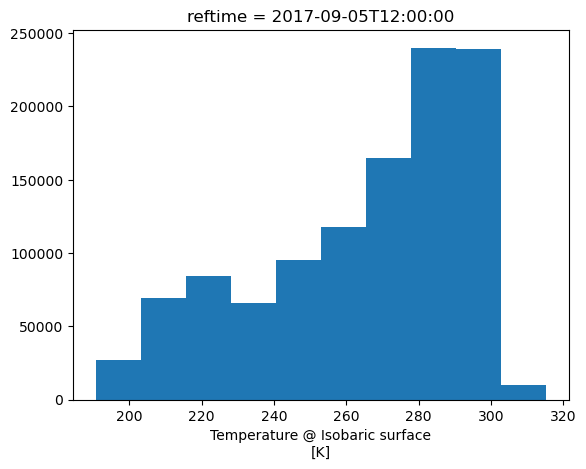

In [25]:
xr.plot.hist(temperature)

Seems reasonable, what about another variable? We can string together both the selection of the DataArray and the plot together in one line, as below. 

(array([ 46182.,  91165., 103430.,  99447.,  95230.,  98645., 118659.,
        164164., 150430., 146803.]),
 array([  0.        ,  10.00467968,  20.00935936,  30.01403999,
         40.01871872,  50.02339935,  60.02807999,  70.03276062,
         80.03743744,  90.04212189, 100.04679871]),
 <BarContainer object of 10 artists>)

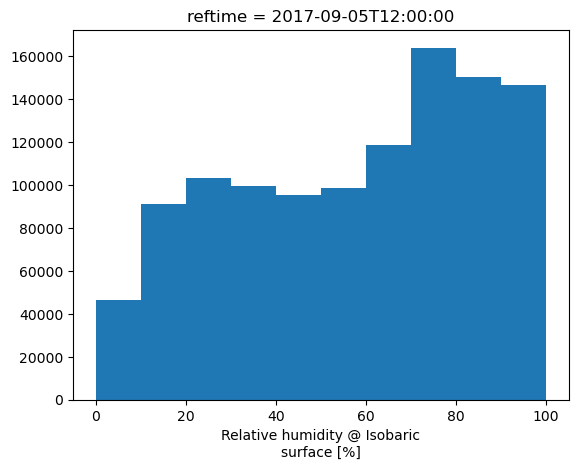

In [26]:
# Preview a histogram of Relative Humidity
xr.plot.hist(data['Relative_humidity_isobaric'])

Do these values look reasonable for relative humidity to you? What could possibly explain the skewed values towards 0%?

In these histograms, every value from every dimension gets dumped into the same pool and divided into buckets. 

What if we want to look for specific features in the data? In that case, we need to reduce our dimensionality from 4 (x, y, z, and t) to just 2 (x and y) for a 2D plot. 

xarray has many indexing tools that make these selections possible. Let's take a closer look at the `.sel()` method. We will use this method using the format:

`DataArray.sel(dimension = 'value')`

Let's first choose a single vertical level. We should start by examining which levels are available. 

In [27]:
# look at available values in the isobaric3 coordinate
temperature['isobaric3']

<xarray.DataArray 'isobaric3' (isobaric3: 21)>
array([ 10000.,  15000.,  20000.,  25000.,  30000.,  35000.,  40000.,  45000.,
        50000.,  55000.,  60000.,  65000.,  70000.,  75000.,  80000.,  85000.,
        90000.,  92500.,  95000.,  97500., 100000.])
Coordinates:
    reftime    datetime64[ns] 2017-09-05T12:00:00
  * isobaric3  (isobaric3) float64 1e+04 1.5e+04 2e+04 ... 9.75e+04 1e+05
Attributes:
    units:     Pa
    positive:  down

Then we choose one level and enter it into our selection. 

In [28]:
# Note the syntax DataArray.sel(dimension='value')
temperature_selection = temperature.sel(isobaric3 = 50000)
temperature_selection

<xarray.DataArray 'Temperature_isobaric' (time1: 5, latitude: 81, longitude: 131)>
array([[[266.69025, 266.49023, ..., 262.99023, 262.99023],
        [266.79022, 266.69025, ..., 263.59024, 263.59024],
        ...,
        [267.89023, 267.89023, ..., 267.59024, 267.69025],
        [267.69025, 267.39023, ..., 267.59024, 267.69025]],

       [[266.3    , 266.3    , ..., 264.4    , 264.3    ],
        [266.3    , 266.4    , ..., 264.6    , 264.6    ],
        ...,
        [267.6    , 267.6    , ..., 268.     , 267.9    ],
        [267.3    , 267.3    , ..., 267.8    , 267.8    ]],

       ...,

       [[265.8    , 265.8    , ..., 265.1    , 265.1    ],
        [266.     , 266.1    , ..., 265.3    , 265.4    ],
        ...,
        [267.3    , 267.2    , ..., 267.5    , 267.5    ],
        [267.4    , 267.5    , ..., 267.6    , 267.5    ]],

       [[265.4    , 265.3    , ..., 264.6    , 264.8    ],
        [265.7    , 265.5    , ..., 264.7    , 264.9    ],
        ...,
        [267.5    , 267.4    , ..., 267.2    , 267.3    ],
        [267.5    , 267.6    , ..., 267.3    , 267.4    ]]], dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 2017-09-05T12:00:00 ... 2017-09-06
    reftime    datetime64[ns] 2017-09-05T12:00:00
  * latitude   (latitude) float32 50.0 49.5 49.0 48.5 ... 11.5 11.0 10.5 10.0
    isobaric3  float64 5e+04
  * longitude  (longitude) float32 250.0 250.5 251.0 251.5 ... 314.0 314.5 315.0
Attributes:
    long_name:                      Temperature @ Isobaric surface
    units:                          K
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

Now our temperature selection is a data array with dimensionality reduced to 3 (x, y, t)

On our quest for a 2D array, we next will choose a single time to select. 

From the above xarray HTML preview, we can preview the times available for the data and see that we have data available from 5 Sept 2017 at 12Z to 6 Sept 2017 at 9Z every 6 hours. We can select a specific time from this list, or we can practice using the `method` parameter to choose a time that's nearest to a time that may not exist within the coordinate. 

We can also use multiple selections in a single line, so let's rewrite our selection to include both time and isobaric level.

In [29]:
# apply two selections in one operation
temperature_selection = temperature.sel(isobaric3=50000, time1='2017-09-06T02', method='nearest')
temperature_selection

<xarray.DataArray 'Temperature_isobaric' (latitude: 81, longitude: 131)>
array([[265.4, 265.3, 265.2, ..., 264.4, 264.6, 264.8],
       [265.7, 265.5, 265.5, ..., 264.5, 264.7, 264.9],
       [266.1, 265.9, 265.8, ..., 264.4, 264.6, 264.8],
       ...,
       [267.5, 267.3, 267.5, ..., 267.3, 267.2, 267.2],
       [267.5, 267.4, 267.5, ..., 267.4, 267.2, 267.3],
       [267.5, 267.6, 267.6, ..., 267.6, 267.3, 267.4]], dtype=float32)
Coordinates:
    time1      datetime64[ns] 2017-09-06
    reftime    datetime64[ns] 2017-09-05T12:00:00
  * latitude   (latitude) float32 50.0 49.5 49.0 48.5 ... 11.5 11.0 10.5 10.0
    isobaric3  float64 5e+04
  * longitude  (longitude) float32 250.0 250.5 251.0 251.5 ... 314.0 314.5 315.0
Attributes:
    long_name:                      Temperature @ Isobaric surface
    units:                          K
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

With our dimensionality now reduced to 2 (x, y), we can plot the array and look at features within the data!

For quick and simple plots like the ones we use in an EDA, we can use the built-in plotting tools to xarray, the `.plot()` method. 

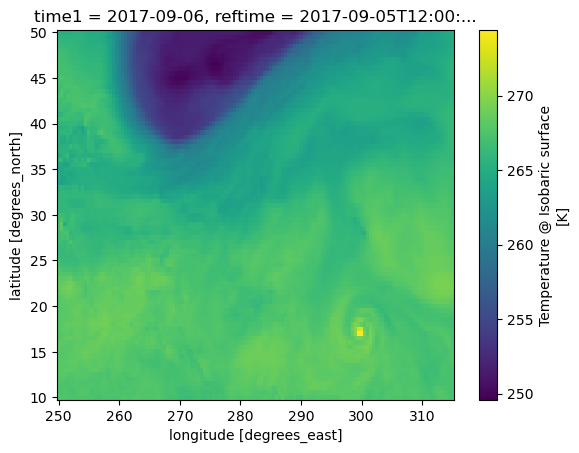

In [30]:
temperature_selection.plot()

With these selection tools, we can quickly string together code to view samples of our data on 2D planes. But be careful of dimension names!

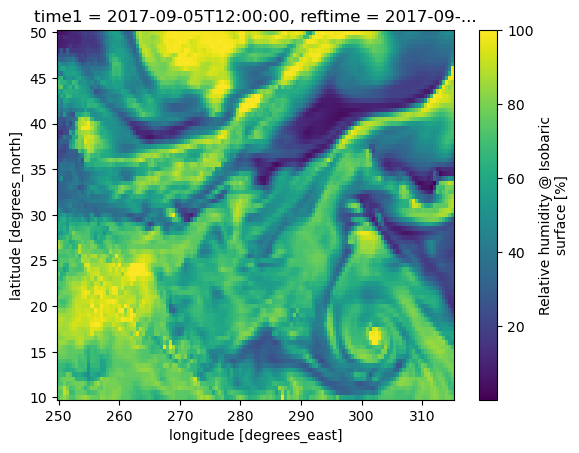

In [31]:
rh_selection = data['Relative_humidity_isobaric'].sel(time1='2017-09-05T12',isobaric3='75000')
rh_selection.plot()

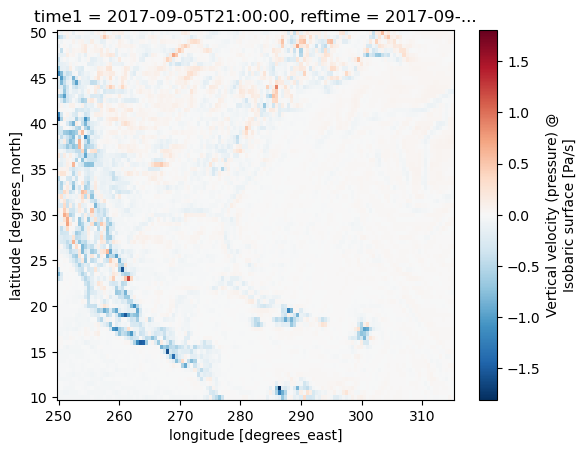

In [32]:
w_selection = data['Vertical_velocity_pressure_isobaric'].sel(time1='2017-09-05T21',isobaric1='100000')
w_selection.plot()

<div class="alert alert-success">
    <b>Exercise</b>: 

Scavenger hunt challenge!
    
<b>Goal:</b>

When the timer starts, open the CMIPC.nc file from the `../data` directory in this notebook and find the following information    
    
- Source (sensor/model/instrument)
- Spatial region or extent
- Valid day(s)/time(s) or forecast times
- Available dimensions and their respective lengths
- Variables and their units

</div>

<div class="alert alert-info">
    <b>SOLUTION</b>

    
<code>mystery = xr.open_dataset('../data/CMIPC.nc')</code><br>
<code>mystery</code>
    
Source: 
- GOES-16
    
Spatial region or extent
- CONUS, continental US
- East CONUS also acceptable
    
Valid day/time: 
- 2022-10-19T14:41:17
    
Available dimensions:
- y = 6000 
- x = 10 000
    
Variables: 
- Sectorized_CMI (Units = “1”, or unitless, or ratio)
- Fixedgrid_projection (Units = none, just a projection reference)

    
</div>

In [33]:
# Practice your code here

## More Information

### Save Your Work
<p>To save any of the files you modified or edited in this session:
    <ol>
        <li>Right click on any item in the left-side navigation pane</li>
        <li>Select <b>Download</b></li>
    </ol>
</p>

<p>
    To recreate the Conda environment used for this session on your local computer:
<ol>
	<li>
		Open a terminal (Linux or MacOS) or Anaconda Prompt (Windows). <br>
		Windows users: If Anaconda Prompt does not exist on your computer, Conda is not installed. Proceed with step 2.2.
	</li>
	<li>
		Confirm that Conda is installed by executing: <br>
		<b>conda --version</b>
		<ol>
			<li>
				If Conda is installed, a version number will be returned. Proceed to step 3.
			</li>
			<li>
				If Conda is not installed, proceed with the installation instructions provided for your operating system at <a href="https://unidata.github.io/python-training/#installing-conda" target="blank">this link</a>, then proceed to step 3.
			</li>
		</ol>
	</li>
	<li>
		Download the conda environment used in this workshop. On the link below, Shift + Right Click &gt; Save link as &gt; save the file as environment.yml in a location of your choosing.<br>
		<a href="https://raw.githubusercontent.com/Unidata/metpy-ams-2024/main/environment.yml">https://raw.githubusercontent.com/Unidata/metpy-ams-2024/main/environment.yml</a>
	</li>
	<li>
		In your terminal or command prompt, change directories to the location where the environment.yml file was saved. 
	</li>
	<li>
		Set up the course Python environment with the following command. <br>
		Note: this will take a few minutes to complete. <br>
		<b>conda env create -f environment.yml</b>
	</li>
	<li>
		Verify that the environment installed correctly by looking for <b>metpy-analysis</b> in your conda environment list <br>
		<b>conda env list</b>
	</li>
	<li>
		To use the new environment, activate the new environment<br>
		<b>conda activate metpy-hytest-2024</b>
	</li>
	<li>
		Launch Jupyter Lab<br>
		<b>jupyter lab</b>
	</li>
</ol>
  
### Connect with NSF Unidata
https://twitter.com/unidata

https://twitter.com/metpy

https://youtube.com/unidatanews

https://www.linkedin.com/company/unidatanews